In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


In [32]:
df = pd.read_csv('Sales_data.csv')
df.head()

,Sl No,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Advertising_Spend
0,0,24-11-2023,Male,34,Beauty,3,50,150,51553
1,1,27-02-2023,Female,26,Clothing,2,500,1000,53426
2,2,13-01-2023,Male,50,Electronics,1,30,30,51943
3,3,21-05-2023,Male,37,Clothing,1,500,500,55481
4,4,06-05-2023,Male,30,Beauty,2,50,100,50000


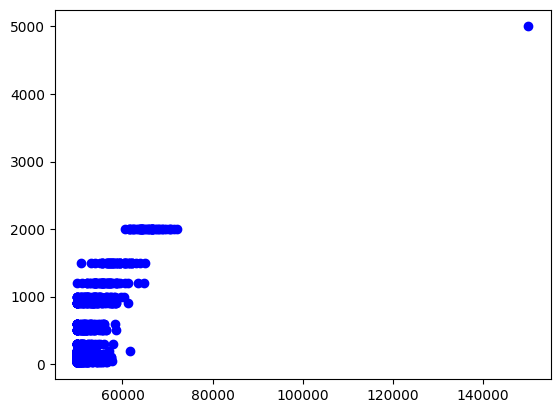

In [33]:
plt.scatter(df['Advertising_Spend'], df['Total Amount'], color='blue'   )

Linear Regression MSE: 128190.52140461582, R²: 0.562084934203509


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


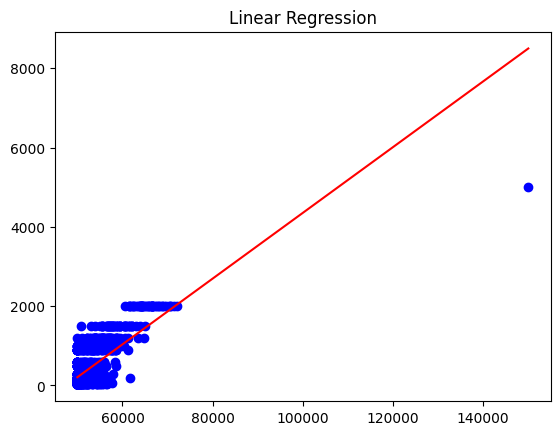

In [34]:
# Linear Regression Model
X = df[['Advertising_Spend']]
y = df['Total Amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Prepare a smooth X range for plotting the linear fit
X_plot = np.linspace(X.values.min(), X.values.max(), 200).reshape(-1, 1)
y_plot_linear = linear_model.predict(X_plot)

plt.scatter(X.squeeze(), y, color='blue')
plt.plot(X_plot, y_plot_linear, color='red')
plt.title('Linear Regression')  

#Calculate MSE and R² for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f'Linear Regression MSE: {mse_linear}, R²: {r2_linear}')

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Polynomial Regression Degree 2 MSE: 116117.64348331906, R²: 0.6033274150931087
Polynomial Regression Degree 3 MSE: 116726.42620193026, R²: 0.6012477361796037


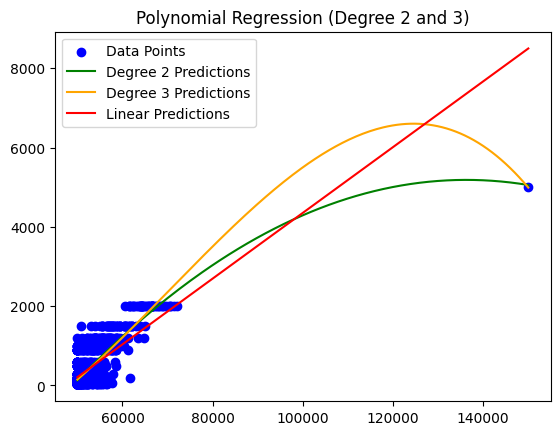

In [35]:
# Polynomial Regression Model with degree 2 and 3
poly_2 = PolynomialFeatures(degree=2)
poly_3 = PolynomialFeatures(degree=3)   
X_poly_2 = poly_2.fit_transform(X)
X_poly_3 = poly_3.fit_transform(X)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_poly_2, y, test_size=0.2, random_state=42)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_poly_3, y, test_size=0.2, random_state=42)
poly_model_2 = LinearRegression()
poly_model_3 = LinearRegression()
poly_model_2.fit(X_train_2, y_train_2)
poly_model_3.fit(X_train_3, y_train_3)
y_pred_poly_2 = poly_model_2.predict(X_test_2)
y_pred_poly_3 = poly_model_3.predict(X_test_3)

# Prepare a smooth X range for plotting model curves (use scalar min/max)
X_plot = np.linspace(X.values.min(), X.values.max(), 200).reshape(-1, 1)
y_plot_poly_2 = poly_model_2.predict(poly_2.transform(X_plot))
y_plot_poly_3 = poly_model_3.predict(poly_3.transform(X_plot))
y_plot_linear = linear_model.predict(X_plot)

plt.scatter(X.squeeze(), y, color='blue', label='Data Points')
plt.plot(X_plot, y_plot_poly_2, color='green', label='Degree 2 Predictions')
plt.plot(X_plot, y_plot_poly_3, color='orange', label='Degree 3 Predictions')
plt.plot(X_plot, y_plot_linear, color='red', label='Linear Predictions')
plt.title('Polynomial Regression (Degree 2 and 3)')
plt.legend()

#Calculate MSE and R² for Polynomial Regression Degree 2
mse_poly_2 = mean_squared_error(y_test_2, y_pred_poly_2)
r2_poly_2 = r2_score(y_test_2, y_pred_poly_2)
print(f'Polynomial Regression Degree 2 MSE: {mse_poly_2}, R²: {r2_poly_2}')
#Calculate MSE and R² for Polynomial Regression Degree 3
mse_poly_3 = mean_squared_error(y_test_3, y_pred_poly_3)
r2_poly_3 = r2_score(y_test_3, y_pred_poly_3)
print(f'Polynomial Regression Degree 3 MSE: {mse_poly_3}, R²: {r2_poly_3}')         

In [37]:
# Create and display comparison table and simple plots
metrics = pd.DataFrame({
    'Model': ['Linear', 'Polynomial (deg 2)', 'Polynomial (deg 3)'],
    'MSE': [mse_linear, mse_poly_2, mse_poly_3],
    'R2': [r2_linear, r2_poly_2, r2_poly_3]
})
display(metrics.round(4))

,Model,MSE,R2
0,Linear,128190.5214,0.5621
1,Polynomial (deg 2),116117.6435,0.6033
2,Polynomial (deg 3),116726.4262,0.6012


***
- We see less MSE and high R2 for Polynomial Degree2
- We see steep up/down behavior in both degree-2 and degree-3 curves, but this happens mainly in regions where there is no real data.
- so Polynomial Degree 2 is better ***
